# Proyek Analisis Data: Bike-sharing-dataset


## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda dalam 2 tahun terakhir?
- Bagaimnana hubungan antara faktor-faktor lingkungan seperti cuaca, musim, dan suhu dengan jumlah peminjaman sepeda baik perharia maupun perjam?

## Import Semua Packages/Library yang Digunakan

In [120]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

#### Memuat dataset day_df

In [121]:
day_df = pd.read_csv("data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


#### Memuat dataset hour_df

In [122]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**

Dari semua hasil di atas adalah tahap gathering data yaitu memuat kedua dataset day_df dan hour_df

#### Assessing Data

#### Menilai dataset day_df

##### Melihat infromasi data apabila terdapat kesalahan tipe data

In [123]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Cek dataset apabalia ada missing values

In [124]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Cek dataset apabila ada duplicate data dan menampilkan statistik deskriptif untuk seluruh variabel dataset

In [125]:
print("Jumlah Duplikasi data : " ,day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi data :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


***Insight***

Dari dataset day_df hanya terdapat kesalahan tipe data datetime pada kolom dteday, tidak terdapat missing values dan duplicate data serta dari hasil describe juga tidak terdapat keanehan

#### Menilai dataset hour_df

##### Melihat Infromasi data apabila terdapat kesalahan tipe data

In [126]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Cek dataset apabalia ada missing values

In [127]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Cek dataset apabila terdapat duplicate dan menampilkan statistik deskriptif untuk seluruh variabel dataset

In [128]:
print("Jumlah Duplikasi data : " ,hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi data :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**


Pada dataset day_df hanya terdapat kesalahan tipe data datetime pada kolom dteday, tidak terdapat missing values dan duplicate data serta dari hasil describe juga tidak terdapat keanehan

#### Cleaning Data

**Setelah Proses Assesing data hanya terdapat kesalahan tipe data pada kolom dteday dari kedua dataset tersebut kolom tersebut seharusnya bertipe data datetime bukan object**

#### Cleaning data day_df dan hour_df

Berikut adalah cara untuk merubah tipe data dari kolom dteday dari kedua dataset tersebut

In [129]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

In [130]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [131]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Ditahap Cleaning data ini hanya merubah tipe data dari object menjadi date time dari kedua dataset tersebut karna tidak terdapat duplicate dan missing values dari tahap Asssesing data

## Exploratory Data Analysis (EDA)

### Explore dataset day_df

Kode berikut digunakan untuk menganalisis data penyewaan sepeda dengan jumlah tertinggi. Hasilnya menunjukkan bahwa penyewaan terbanyak terjadi pada 15 Desember 2012, di musim gugur dengan kondisi cuaca Clear, Few clouds, Partly cloudy, Partly cloudy.

In [132]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


berikut adalah code untuk mengelompokan data berdasarkan kolom dteday dan jam kerja, menghitung jumlah penyeweaan sepeda, mengurutkan hasil berdasarkan jumlah penyewaan sepeda perdteday, dan menambahkan total penyewaan sepeda di seluruh dteday pada hari kerja dan hari tidak kerja.

In [133]:
# Mengelompokkan data berdasarkan kolom dateday dan hari kerja, dan menghitung jumlah penyewa sepeda
day_grouped_workingday = day_df[day_df['workingday'] == 1].groupby(by=["dteday"]).agg({"cnt": "sum"})
day_grouped_no_workingday = day_df[day_df['workingday'] == 0].groupby(by=["dteday"]).agg({"cnt": "sum"})

# Mengurutkan hasil berdasarkan jumlah penyewa sepeda per dateday
day_grouped_workingday_sorted = day_grouped_workingday.sort_values(by="cnt", ascending=False)
day_grouped_no_workingday_sorted = day_grouped_no_workingday.sort_values(by="cnt", ascending=False)

# Menambahkan total penyewa sepeda di seluruh dateday pada hari kerja dan tidak hari kerja
total_workingday = day_grouped_workingday["cnt"].sum()
total_no_workingday = day_grouped_no_workingday["cnt"].sum()

print("Jumlah penyewa per dateday pada hari kerja :")
print(day_grouped_workingday_sorted)
print("\nTotal penyewa sepeda pada hari kerja:", total_workingday)

print("\nJumlah penyewa per dateday pada hari tidak kerja :")
print(day_grouped_no_workingday_sorted)
print("\nTotal penyewa sepeda pada hari tidak kerja:", total_no_workingday)


Jumlah penyewa per dateday pada hari kerja :
             cnt
dteday          
2012-03-23  8362
2012-07-25  8173
2012-09-21  8167
2012-10-05  8156
2012-09-14  8009
...          ...
2011-03-10   623
2011-01-26   506
2012-12-26   441
2011-01-27   431
2012-10-29    22

[500 rows x 1 columns]

Total penyewa sepeda pada hari kerja: 2292410

Jumlah penyewa per dateday pada hari tidak kerja :
             cnt
dteday          
2012-09-15  8714
2012-09-29  8555
2012-09-22  8395
2012-05-19  8294
2012-09-09  8227
...          ...
2011-01-02   801
2011-04-16   795
2011-12-25   754
2011-10-29   627
2011-03-06   605

[231 rows x 1 columns]

Total penyewa sepeda pada hari tidak kerja: 1000269


Kode berikut digunakan untuk menganalisis hubungan antara penyewaan sepeda dengan musim dan kondisi cuaca. Hasilnya menunjukkan bahwa puncak peminjaman terjadi pada musim gugur dengan cuaca cerah, sedikit awan, dan sebagian berawan. Sebaliknya, peminjaman sangat rendah saat cuaca buruk seperti Hujan Lebat + Butiran Es + Badai Petir + Kabut, serta Salju + Kabut, yang hanya terjadi pada musim semi. Selain itu, peminjaman juga cukup sedikit saat cuaca seperti Salju Ringan, Hujan Ringan + Badai Petir + Awan Terpecah, dan Hujan Ringan + Awan Terpecah jika dibandingkan dengan cuaca cerah.

In [134]:
day_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                        
                    max   min         mean          std     sum
season weathersit                                              
1      1           6312   431  2811.135135  1409.960622  312036
       2           7836   605  2357.166667  1313.332082  155573
       3           2169   441   934.750000   826.272100    3739
2      1           8294  2028  5548.548673  1467.655078  626986
       2           8362  1471  4236.705882  1579.038070  288096
       3           1685   795  1169.000000   461.679543    3507
3      1           8714  3285  5878.257353  1356.647125  799443
       2           7582  1115  5222.479167  1431.160502  250679
       3           4459  1842  2751.750000  1199.339923   11007
4      1           8555  1495  5043.563107  1595.693909  519487
       2           7852  1096  4654.000000  1523.445365  302510
       3           4639    22  1961.600000  1329.287378   19616

Selain menganalisis hubungan antara jumlah penyewa dengan musim dan cuaca, penting juga untuk mengetahui korelasinya dengan faktor-faktor cuaca lainnya seperti suhu, kelembaban, dan kecepatan angin. Hasilnya menunjukkan bahwa suhu berhubungan positif dengan jumlah penyewa, yang berarti semakin tinggi dan stabil suhu di suatu daerah, semakin banyak penyewa sepeda per jam. Sebaliknya, kelembaban dan kecepatan angin memiliki hubungan negatif dengan penyewaan sepeda, di mana semakin tinggi kelembaban dan kecepatan angin, semakin sedikit penyewa sepeda, meskipun nilai korelasinya hanya -0,2 dan -0,1.

In [135]:
#Menghitung hubungan korelasi antara variabel suhu (temp), suhu yang dirasakan (atemp), kelembapan (hum), kecepatan angin (windspeed), dan jumlah penyewaan sepeda (cnt).
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [136]:
day_df.to_csv("main_data.csv", index=False)

### Explore dataset hour_df

Kode berikut digunakan untuk menganalisis data penyewaan sepeda dengan jumlah tertinggi. Hasilnya menunjukkan bahwa penyewaan terbanyak terjadi pada 9 Desember 2012, pukul 18:00, hari Rabu , di musim gugur dengan kondisi cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Selain itu, lima penyewaan dengan jumlah tertinggi umumnya terjadi pada sore hari. Sebaliknya, jumlah penyewaan terendah tercatat pada dini hari.

In [137]:
hour_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,2,1,4,5,0,6,0,1,0.50,0.4848,0.82,0.2537,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
1041,1042,2011-02-16,1,0,2,3,0,3,1,2,0.20,0.1970,0.47,0.1940,0,1,1


Kode berikut digunakan untuk menganalisis jumlah penyewaan sepeda secara lebih rinci setiap jam. Hasilnya menunjukkan bahwa puncak peminjaman terjadi pada pukul 17.00. Sebaliknya, jumlah penyewaan paling rendah tercatat pada dini hari. Hal ini menunjukkan bahwa sebagian besar pengguna memanfaatkan sepeda pada sore hari, sementara di pagi dini hari aktivitas peminjaman masih minim. Selain itu, sore hari sering bertepatan dengan waktu pulang kerja, di mana banyak orang menggunakan sepeda untuk perjalanan pulang atau berolahraga.

In [138]:
# Mengelompokkan data berdasarkan jam dan menghitung berbagai statistik tentang jumlah penyewaan sepeda
hour_group = hour_df.groupby(by="hr").agg({
    # Menambahkan "sum" untuk menghitung total penyewaan
    "cnt": ["max", "min", "mean", "std", "sum"]  
})

# Mengurutkan hasil berdasarkan total jumlah penyewaan sepeda (kolom 'sum') secara menurun (descending)
hour_group_sorted = hour_group.sort_values(by=("cnt", "sum"), ascending=False)

# Menampilkan hasil pengelompokan dan pengurutan data
print(hour_group_sorted)

    cnt                                    
    max min        mean         std     sum
hr                                         
17  976  15  461.452055  232.656611  336860
18  977  23  425.510989  224.639304  309772
8   839   5  359.011004  235.189285  261001
16  783  11  311.983562  148.682618  227748
19  743  11  311.523352  161.050359  226789
13  760  11  253.661180  148.107657  184919
12  776   3  253.315934  145.081134  184414
15  750   7  251.233196  144.632541  183149
14  750  12  240.949246  147.271574  175652
20  567  11  226.030220  119.670164  164550
9   426  14  219.309491   93.703458  159438
7   596   1  212.064649  161.441936  154171
11  663  10  208.143054  127.495536  151320
10  539   8  173.668501  102.205413  126257
21  584   6  172.314560   89.788893  125445
22  502   9  131.335165   69.937782   95612
23  256   2   87.831044   50.846889   63941
6   213   1   76.044138   55.084348   55132
0   283   2   53.898072   42.307910   39130
1   168   1   33.375691   33.538

berikut adalah code untuk mengelompokan data berdasarkan jam kerja, menghitung jumlah penyeweaan sepeda, mengurutkan hasil berdasarkan jumlah penyewaan sepeda perjam, dan menambahkan total penyewaan sepeda di seluruh jam pada kerja dan hari tidak kerja.

In [139]:
# Mengelompokkan data berdasarkan jam dan hari kerja, dan menghitung jumlah penyewa sepeda
hour_grouped_workingday = hour_df[hour_df['workingday'] == 1].groupby(by=["hr"]).agg({"cnt": "sum"})
hour_grouped_no_workingday = hour_df[hour_df['workingday'] == 0].groupby(by=["hr"]).agg({"cnt": "sum"})

# Mengurutkan hasil berdasarkan jumlah penyewa sepeda per jam
hour_grouped_workingday_sorted = hour_grouped_workingday.sort_values(by="cnt", ascending=False)
hour_grouped_no_workingday_sorted = hour_grouped_no_workingday.sort_values(by="cnt", ascending=False)

# Menambahkan total penyewa sepeda di seluruh jam pada hari kerja dan tidak hari kerja
total_workingday = hour_grouped_workingday["cnt"].sum()
total_no_workingday = hour_grouped_no_workingday["cnt"].sum()

print("Jumlah penyewa per jam pada hari kerja :")
print(hour_grouped_workingday_sorted)
print("\nTotal penyewa sepeda pada hari kerja:", total_workingday)

print("\nJumlah penyewa per jam pada hari tidak kerja :")
print(hour_grouped_no_workingday_sorted)
print("\nTotal penyewa sepeda pada hari tidak kerja:", total_no_workingday)


Jumlah penyewa per jam pada hari kerja :
       cnt
hr        
17  262120
18  245129
8   236595
19  173504
16  146268
7   144144
20  124360
9   119793
15  100263
12   99808
13   98818
21   92771
14   91419
11   78482
22   68918
10   67142
6    50840
23   44177
0    18246
5    12332
1     8177
2     4229
4     2552
3     2323

Total penyewa sepeda pada hari kerja: 2292410

Jumlah penyewa per jam pada hari tidak kerja :
      cnt
hr       
13  86101
12  84606
14  84233
15  82886
16  81480
17  74740
11  72838
18  64643
10  59115
19  53285
20  40190
9   39645
21  32674
22  26694
8   24406
0   20884
23  19764
1   15987
2   12123
7   10027
3    5851
6    4292
5    1929
4    1876

Total penyewa sepeda pada hari tidak kerja: 1000269


Kode berikut digunakan untuk menganalisis hubungan antara penyewaan sepeda dengan musim dan kondisi cuaca. Hasilnya menunjukkan bahwa jumlah peminjaman tertinggi terjadi pada musim gugur dengan cuaca cerah, sedikit awan, atau sebagian berawan. Sebaliknya, penyewaan sepeda sangat rendah pada cuaca dengan kondisi seperti hujan lebat, hujan es, badai petir, kabut, salju, dan kabut, yang hanya terjadi pada musim semi. Selain itu, peminjaman sepeda juga relatif sedikit pada cuaca seperti salju ringan, hujan ringan dengan badai petir, dan awan tersebar, dibandingkan dengan cuaca cerah.

In [140]:
hour_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                    
                   max min        mean         std     sum
season weathersit                                         
1      1           801   1  122.055535  127.384258  325278
       2           712   1  103.074689  106.154745  124205
       3           520   1   58.650407   74.793446   21642
       4           164  23   74.333333   77.925178     223
2      1           873   1  232.410983  198.312457  664463
       2           957   1  181.261364  164.832349  207363
       3           782   1  115.179803  130.760396   46763
3      1           977   1  244.494207  201.732720  801941
       2           868   2  224.848997  185.406665  212932
       3           891   1  171.955390  175.871513   46256
4      1           967   1  209.463779  190.891851  546491
       2           905   1  201.483974  173.833617  251452
       3           856   1  116.453333  127.471365   43670

Selain menganalisis hubungan antara jumlah penyewa dengan musim dan cuaca, kita juga perlu mengeksplorasi korelasinya dengan faktor cuaca seperti temperatur, kelembaban, dan kecepatan angin. Berdasarkan hasil yang diperoleh, faktor temperatur menunjukkan hubungan positif dengan jumlah penyewa sepeda. Artinya, semakin tinggi dan stabil suhu di suatu wilayah, semakin banyak pula penyewa sepeda per jam. Sebaliknya, kelembaban yang tinggi cenderung mengurangi jumlah penyewa sepeda. Terakhir, faktor kecepatan angin (windspeed) memiliki pengaruh yang sangat kecil terhadap penyewaan sepeda, karena korelasinya hanya 0.09.

In [141]:
#Menghitung hubungan korelasi antara variabel suhu (temp), suhu yang dirasakan (atemp), kelembapan (hum), kecepatan angin (windspeed), dan jumlah penyewaan sepeda (cnt).
hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dalam 2 tahun terakhir?

In [142]:
monthly_sharing_df = day_df.resample(rule='ME', on='dteday').agg({
    "cnt": "sum"
})
monthly_sharing_df.index = monthly_sharing_df.index.strftime('%Y-%m')
monthly_sharing_df = monthly_sharing_df.reset_index()
monthly_sharing_df.rename(columns={
    "dteday": "Bulan",
    "cnt": "Total_Peminjaman"
}, inplace=True)
monthly_sharing_df

,Bulan,Total_Peminjaman
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


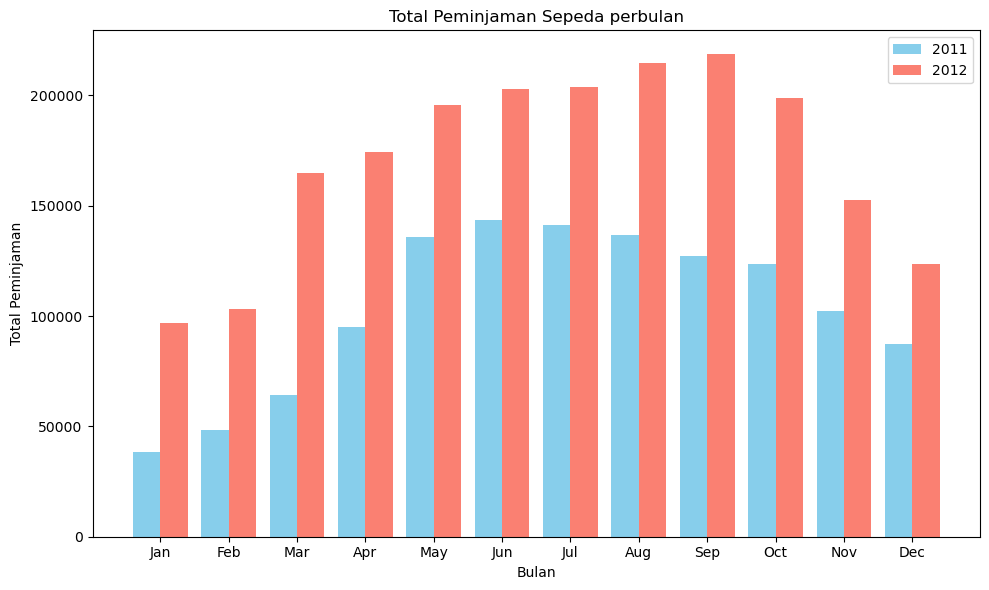

In [143]:
monthly_sharing_df = day_df.resample(rule='ME', on='dteday').agg({"cnt": "sum"})
monthly_sharing_df.index = monthly_sharing_df.index.strftime('%Y-%m')
monthly_sharing_df = monthly_sharing_df.reset_index()
monthly_sharing_df.rename(columns={"dteday": "Bulan", "cnt": "Total_Peminjaman"}, inplace=True)

# Mengonversi kolom 'Bulan' menjadi tipe data datetime
monthly_sharing_df['Bulan'] = pd.to_datetime(monthly_sharing_df['Bulan'])

# Memisahkan data untuk tahun 2011 dan 2012
monthly_sharing_2011 = monthly_sharing_df[monthly_sharing_df['Bulan'].dt.year == 2011]
monthly_sharing_2012 = monthly_sharing_df[monthly_sharing_df['Bulan'].dt.year == 2012]

# Plotting
plt.figure(figsize=(10, 6))

# Plot untuk tahun 2011 (Bar Plot)
plt.bar(monthly_sharing_2011['Bulan'].dt.month - 0.2, monthly_sharing_2011['Total_Peminjaman'], width=0.4, label='2011', color='skyblue')

# Plot untuk tahun 2012 (Bar Plot)
plt.bar(monthly_sharing_2012['Bulan'].dt.month + 0.2, monthly_sharing_2012['Total_Peminjaman'], width=0.4, label='2012', color='salmon')

# Konfigurasi plot
plt.title('Total Peminjaman Sepeda perbulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan grafik yang ditampilkan, terlihat bahwa jumlah peminjaman sepeda pada tahun 2012 jauh lebih tinggi dibandingkan dengan tahun 2011. Di tahun 2012, bulan September menjadi puncak peminjaman, diikuti dengan penurunan yang signifikan pada bulan-bulan berikutnya. Sementara itu, pada tahun 2011, jumlah peminjaman terus meningkat hingga bulan Mei, tetapi setelah itu mengalami penurunan yang lebih stabil hingga akhir tahun. Hal ini menunjukkan bahwa meskipun ada fluktuasi, ada pertumbuhan yang lebih signifikan pada tahun 2012, yang menunjukkan tren peningkatan jumlah penyewaan sepeda dari tahun ke tahun.

### Pertanyaan 2: Bagaimnana hubungan antara faktor-faktor lingkungan seperti cuaca, musim, dan suhu dengan jumlah peminjaman sepeda baik perharia maupun perjam?

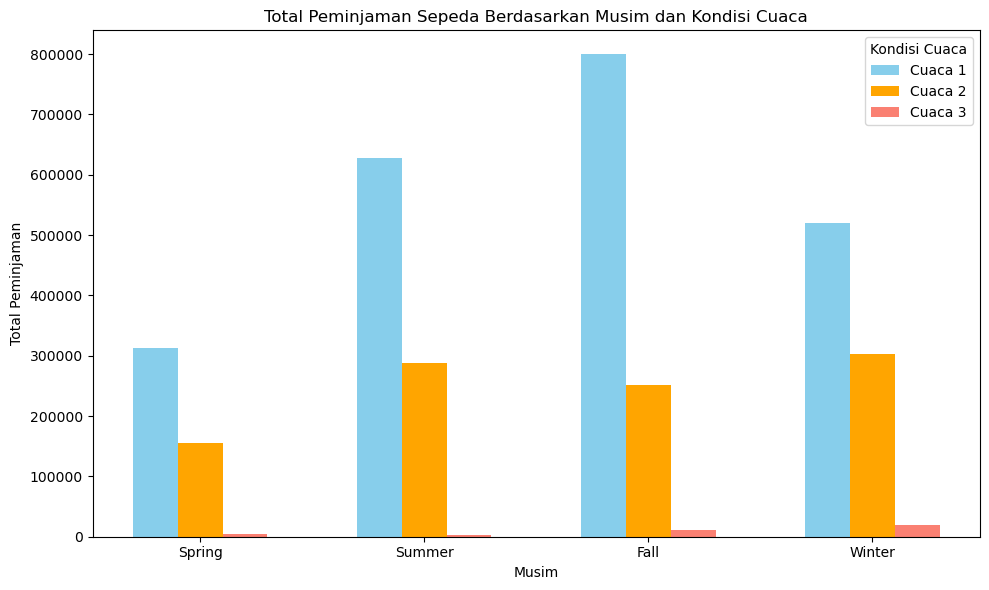

In [146]:
season_weather_stats = day_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

# Ubah multiindex menjadi single index untuk memudahkan visualisasi
season_weather_stats.columns = ['_'.join(col).strip() for col in season_weather_stats.columns.values]
season_weather_stats.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

# Warna untuk kondisi cuaca
weather_colors = {
    1: 'skyblue',  # Clear
    2: 'orange',   # Mist
    3: 'salmon',   # Light Snow
    4: 'lightgreen'  # Heavy Rain + Ice Pallets + Thunderstorm + Mist
}

# Untuk memplot grouped bar plot dengan warna yang konsisten
weather_sits = season_weather_stats['weathersit'].unique()
width = 0.2  # Lebar setiap bar

# Menghitung posisi X untuk setiap bar
for i, weather_sit in enumerate(weather_sits):
    weather_sit_data = season_weather_stats[season_weather_stats['weathersit'] == weather_sit]
    color = weather_colors.get(weather_sit, 'gray')  # Menentukan warna untuk setiap cuaca
    plt.bar(weather_sit_data['season'] + i * width - 0.2, weather_sit_data['cnt_sum'], width=width, label=f'Cuaca {weather_sit}', color=color)

# Konfigurasi plot
plt.title('Total Peminjaman Sepeda Berdasarkan Musim dan Kondisi Cuaca')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.legend(title='Kondisi Cuaca')
plt.xticks(range(1, 5), ['Spring', 'Summer', 'Fall', 'Winter'])

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, musim gugur (musim 3) menjadi salah satu faktor yang meningkatkan jumlah penyewaan sepeda. Penyewaan sepeda cenderung paling tinggi saat cuaca cerah, yang mendorong lebih banyak orang untuk menggunakan sepeda sewaan. Sebaliknya, di berbagai musim, terlihat bahwa penyewaan sepeda menurun secara signifikan saat cuaca buruk, terutama pada musim 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist), di mana tidak ada penyewa sepeda sama sekali. Dari sini, dapat disimpulkan bahwa musim dan kondisi cuaca pada hari tertentu sangat memengaruhi tingkat penyewaan sepeda.

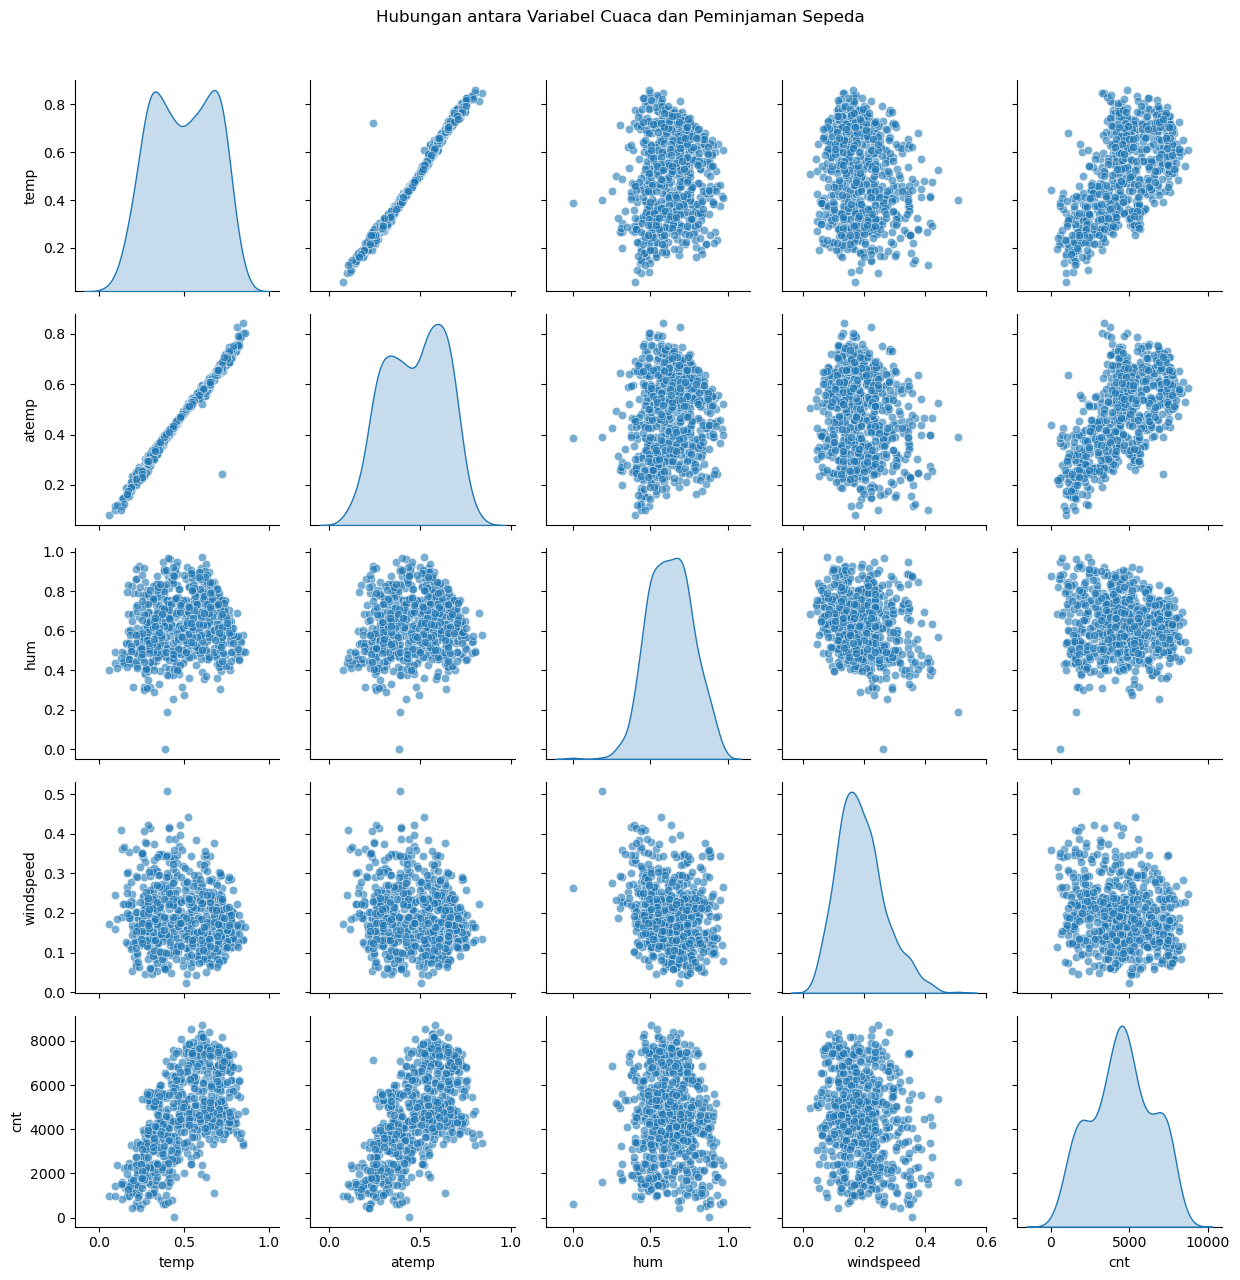

In [147]:
# Memilih kolom yang relevan untuk analisis korelasi
variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Membuat pairplot untuk visualisasi hubungan antar variabel
sns.pairplot(day_df[variables], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.6})

# Menambahkan judul
plt.suptitle('Hubungan antara Variabel Cuaca dan Peminjaman Sepeda', y=1.02)
plt.tight_layout()
plt.show()


Pada heatmap korelasi di atas, dapat dilihat bahwa suhu (temp) memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda (0.63), yang menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Sebaliknya, kelembaban (humidity) dan kecepatan angin (windspeed) memiliki korelasi negatif, yang berarti bahwa ketika kelembaban dan angin semakin tinggi, penyewaan sepeda cenderung menurun. Visualisasi menggunakan pairplot memperlihatkan hubungan ini lebih jelas, dengan suhu yang menunjukkan hubungan positif terhadap jumlah penyewaan sepeda, sementara kelembaban dan kecepatan angin cenderung menurunkan jumlah penyewaan.

## Conclusion

- Tren penyewaan sepeda menunjukkan peningkatan yang signifikan antara tahun 2011 dan 2012, yang mengindikasikan bahwa bisnis penyewaan sepeda mengalami pertumbuhan tahunan. Hal ini menunjukkan bahwa masyarakat semakin menyadari adanya layanan penyewaan sepeda dan banyak yang memanfaatkannya. 
- Faktor musim dan kondisi cuaca terbukti memiliki pengaruh besar terhadap tingkat penyewaan sepeda. Berbeda dengan kendaraan pribadi seperti mobil, sepeda lebih banyak digunakan saat cuaca cerah dan mendukung aktivitas luar ruangan. Oleh karena itu, faktor cuaca, termasuk temperatur, kelembaban, dan kecepatan angin, memainkan peranan penting dalam memengaruhi jumlah penyewa sepeda.